#### Quando i nostri ristoranti vendono di più? In corrispondenza di che festività? 

In [1]:
import pandas as pd
import datetime 
import holidays
from collections import ChainMap

In [2]:
data_cleaned=pd.read_csv("datapuliti.csv", index_col=0)

In [3]:
data_cleaned["Date"]=pd.to_datetime(data_cleaned["Date"])

In [4]:
# Select country
it_holidays_2017= holidays.Italy(years = 2017)
it_holidays_2018= holidays.Italy(years = 2018)
it_holidays_2019= holidays.Italy(years = 2019)
it_holidays_2020= holidays.Italy(years = 2020)
it_holidays_2021= holidays.Italy(years = 2021)

In [5]:
d4 = dict(it_holidays_2017)
d4.update(it_holidays_2018)
d4.update(it_holidays_2019)
d4.update(it_holidays_2020)
d4.update(it_holidays_2021)

In [6]:
def ciao(x):
    l=list(d4.keys())
    y=0
    for i in l: 
        if x ==i:
            y=d4.get(i)
    return y


data_cleaned['Holidays']=data_cleaned['Date'].apply(ciao)

        
    

In [7]:
data_1=data_cleaned.groupby("Holidays",as_index=False)["Vendite_1"].sum()
data_1= data_1.drop(labels=0,axis=0)

In [8]:
data_2=data_cleaned.groupby("Holidays",as_index=False)["Vendite_2"].sum()
data_2= data_2.drop(labels=0,axis=0)

In [9]:
data_3=data_cleaned.groupby("Holidays",as_index=False)["Vendite_3"].sum()
data_3= data_3.drop(labels=0,axis=0)

In [10]:
data_4=data_cleaned.groupby("Holidays",as_index=False)["Vendite_4"].sum()
data_4= data_4.drop(labels=0,axis=0)

In [11]:
data_5=data_cleaned.groupby("Holidays",as_index=False)["Vendite_5"].sum()
data_5= data_5.drop(labels=0,axis=0)

In [12]:
data_6=data_cleaned.groupby("Holidays",as_index=False)["Vendite_6"].sum()
data_6= data_6.drop(labels=0,axis=0)

#### 1. Analisi descrittiva - correlazioni, pie chart, bar chart, scatter plot, box plot


In [13]:
media_vendite1=data_cleaned.groupby("Holidays",as_index=False)["Vendite_1"].mean()
media_vendite2=data_cleaned.groupby("Holidays",as_index=False)["Vendite_2"].mean()
media_vendite3=data_cleaned.groupby("Holidays",as_index=False)["Vendite_3"].mean()
media_vendite4=data_cleaned.groupby("Holidays",as_index=False)["Vendite_4"].mean()
media_vendite5=data_cleaned.groupby("Holidays",as_index=False)["Vendite_5"].mean()
media_vendite6=data_cleaned.groupby("Holidays",as_index=False)["Vendite_6"].mean()


In [14]:
err1=list(data_cleaned.groupby("Holidays")["Vendite_1"].std())
err2=list(data_cleaned.groupby("Holidays")["Vendite_2"].std())
err3=list(data_cleaned.groupby("Holidays")["Vendite_3"].std())
err4=list(data_cleaned.groupby("Holidays")["Vendite_4"].std())
err5=list(data_cleaned.groupby("Holidays")["Vendite_5"].std())
err6=list(data_cleaned.groupby("Holidays")["Vendite_6"].std())


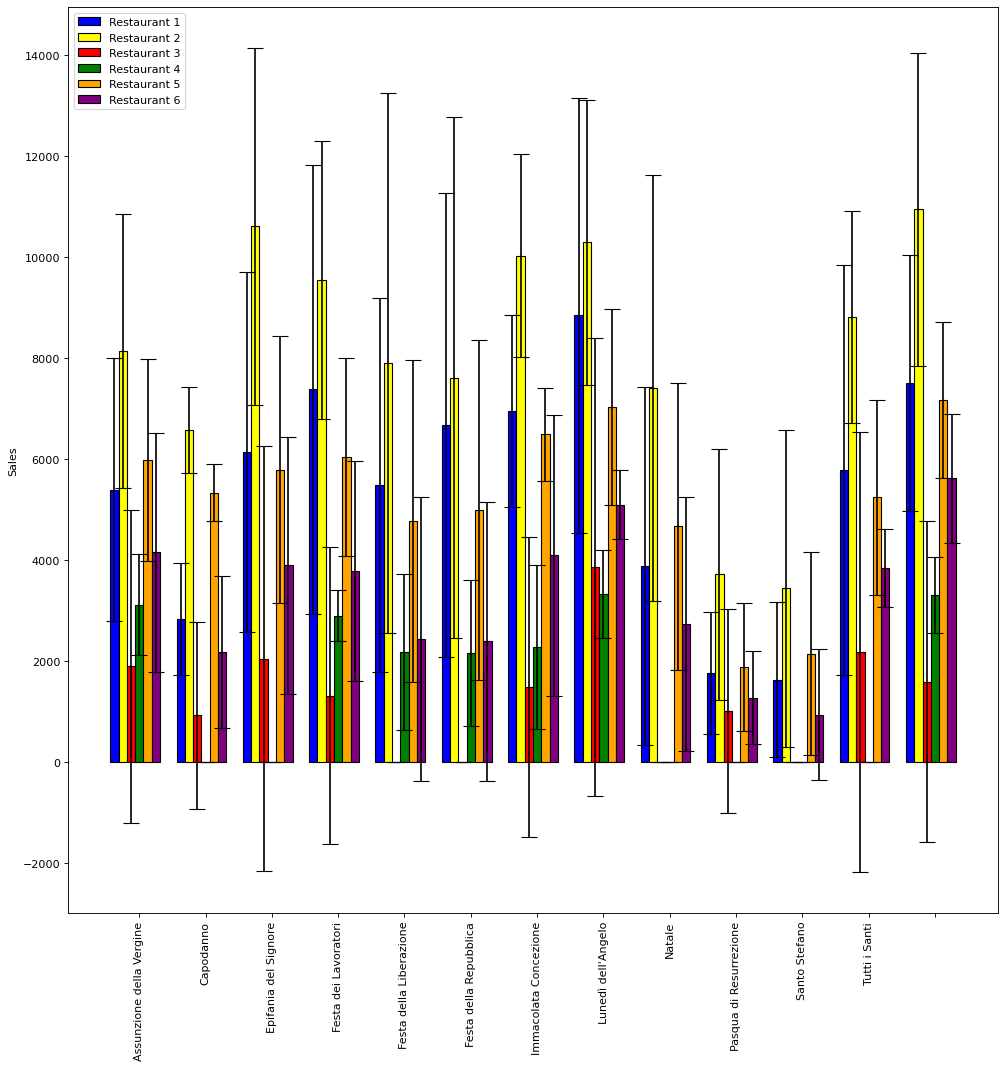

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15), dpi=80)
# width of the bars
barWidth = 1
 
# Choose the height of the blue bars
bars1 = media_vendite1["Vendite_1"]
bars2 = media_vendite2["Vendite_2"]
bars3 = media_vendite3["Vendite_3"]
bars4 = media_vendite4["Vendite_4"]
bars5 = media_vendite5["Vendite_5"]
bars6 = media_vendite6["Vendite_6"]

# The x position of bars
r1 = [0,   8,   16,   24,    32,   40,    48,    56,   64,   72,   80,  88, 96]
r2 = [r+barWidth for r in r1]
     #[0.5, 4.5, 8.5, 12.5,  16.5, 20.5,  24.5, 28.5, 32.5, 36.5, 40.5, 44.5]
r3 = [r+barWidth for r in r2] 
#[1,   5,   9,   13,  17, 21,  25, 29, 33, 37, 41, 45]
r4 = [r+barWidth for r in r3]
#[1.5, 5.5, 9.5, 13.5,  17.5, 21.5,  25.5, 29.5, 33.5, 37.5, 41.5, 45.5]
r5 = [r+barWidth for r in r4]
#[2,   6,   10,  14,  18, 22,  26, 30, 34, 38, 42, 46]
r6 = [r+barWidth for r in r5]
#[2.5, 6.5, 10.5, 14.5,  18.5, 22.5,  26.5, 30.5, 34.5, 38.5, 42.5, 46.5]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', yerr=err1, edgecolor = 'black', capsize=7, label='Restaurant 1')
plt.bar(r2, bars2, width = barWidth, color = 'yellow', yerr=err2, edgecolor = 'black', capsize=7, label='Restaurant 2')
plt.bar(r3, bars3, width = barWidth, color = 'red', yerr=err3, edgecolor = 'black', capsize=7, label='Restaurant 3')
plt.bar(r4, bars4, width = barWidth, color = 'green', yerr=err4,edgecolor = 'black', capsize=7, label='Restaurant 4')
plt.bar(r5, bars5, width = barWidth, color = 'orange', yerr=err5,edgecolor = 'black', capsize=7, label='Restaurant 5')
plt.bar(r6, bars6, width = barWidth, color = 'purple',yerr=err6, edgecolor = 'black', capsize=7, label='Restaurant 6')

# general layout
plt.xticks(r4, data_1["Holidays"], rotation="vertical")
plt.ylabel('Sales')
plt.legend()
 
# Show graphic
plt.show()

Scegliamo di indagare i ristoranti 1 e 2 nel tempo per ogni festività

Ristorante 1,2,5 con overall sales >20000
Ristorante 3,4,6 con overall sales<20000



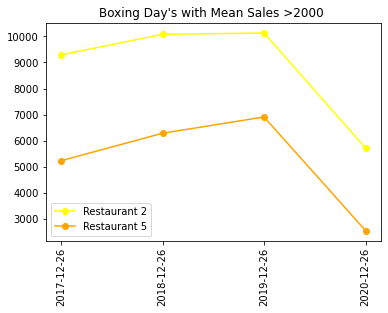

In [16]:
#santo_stefano, ho messo la soglia a 2000, perchè sono tutti <6000
santo_stefano=data_cleaned[data_cleaned["Holidays"]=="Santo Stefano"]
santo_stefano_1=santo_stefano[["Date","Vendite_1"]]
santo_stefano_2=santo_stefano[["Date","Vendite_2"]]
santo_stefano_3=santo_stefano[["Date","Vendite_3"]]
santo_stefano_5=santo_stefano[["Date","Vendite_5"]]
santo_stefano_6=santo_stefano[["Date","Vendite_6"]] #il 4 è chiuso


#plottiamo in due grafici separati i ristoranti con guadagno non festivo medio <6000 e i un altro quelli >6000
#sales non festive>6000
#plt.figure(figsize=(8,9), dpi=80)

plt.plot( 'Date', 'Vendite_2', data=santo_stefano_2, marker='o', color='yellow',label="Restaurant 2")
plt.plot( 'Date', 'Vendite_5', data=santo_stefano_5, marker='o', color='orange',label="Restaurant 5")

plt.title("Boxing Day's with Mean Sales >2000 ")
plt.xticks(santo_stefano_1["Date"], rotation="vertical")
plt.legend()
plt.show()


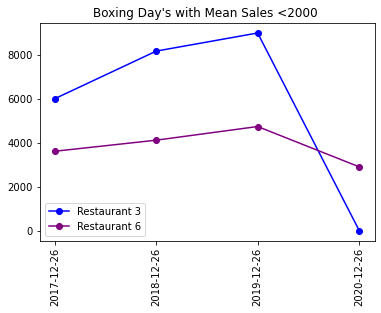

In [17]:
plt.plot( 'Date', 'Vendite_1', data=santo_stefano_1, marker='o', color='blue',label="Restaurant 3")
plt.plot( 'Date', 'Vendite_6', data=santo_stefano_6, marker='o', color='purple',label="Restaurant 6")
plt.title("Boxing Day's with Mean Sales <2000 ")
plt.xticks(santo_stefano_3["Date"], rotation="vertical")
plt.legend()
plt.show()

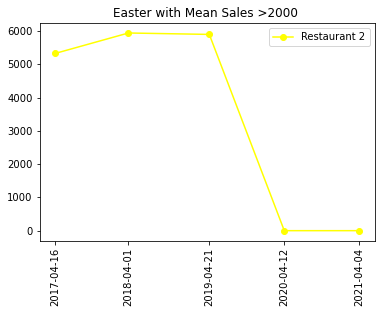

In [18]:
#Pasqua di Resurrezione
pasqua=data_cleaned[data_cleaned["Holidays"]=="Pasqua di Resurrezione"]
pasqua_1=pasqua[["Date","Vendite_1"]]
pasqua_2=pasqua[["Date","Vendite_2"]]
pasqua_3=pasqua[["Date","Vendite_3"]]
pasqua_5=pasqua[["Date","Vendite_5"]]
pasqua_6=pasqua[["Date","Vendite_6"]] #il 4 è chiuso


#plottiamo in due grafici separati i ristoranti con guadagno non festivo medio <6000 e i un altro quelli >6000
#sales non festive>6000
#plt.figure(figsize=(8,9), dpi=80)
#plt.plot( 'Date', 'Vendite_1', data=capodanno_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_2', data=pasqua_2, marker='o', color='yellow',label="Restaurant 2")
#plt.plot( 'Date', 'Vendite_5', data=capodanno_5, marker='o', color='orange',label="Restaurant 5")

plt.title("Easter with Mean Sales >2000 ")
plt.xticks(pasqua_2["Date"], rotation="vertical")
plt.legend()
plt.show()


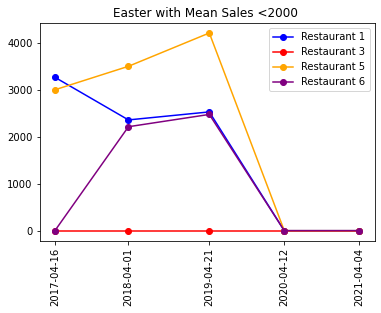

In [19]:
plt.plot( 'Date', 'Vendite_1', data=pasqua_1, marker='o', color='blue',label="Restaurant 1")
plt.plot( 'Date', 'Vendite_3', data=pasqua_3, marker='o', color='red',label="Restaurant 3")
plt.plot( 'Date', 'Vendite_5', data=pasqua_5, marker='o', color='orange',label="Restaurant 5")
plt.plot( 'Date', 'Vendite_6', data=pasqua_6, marker='o', color='purple',label="Restaurant 6")
plt.title("Easter with Mean Sales <2000 ")
plt.xticks(pasqua_1["Date"], rotation="vertical")
plt.legend()
plt.show()

#### 2. A seguito dell'analisi descrittiva quali bar teniamo? Quali sono statisticamente significativi? Su quali andiamo a fare forecasting?
#### 3. Ricerca modello SERIE (arima, sarima) - correlazioni, stagionalità, forecasting(quanto venderanno nel Natale 2021? E a Pasqua 2022?) 